# AI vs Human
- 목표: 1)인간과 AI 중 인간이 작성한 것을 예측하기 2)한국어 NLP모델 학습 및 적용
- To define problem: Binary classification
- Train dataset을 활용해서 Test dataset의 결측치를 알맞게 예측
- 데이터: Dacon https://dacon.io/competitions/official/236178/overview/description
- 결론 및 시사점: XGBRegressor, LGBMRegressor 모델이 예측에 가장 높은 성능을 보였음. 그러나 데이터의 단순함으로 인해 추가적인 분석을 하기에 한계가 있다고 판단함. 이를 보완하는 방법으로는 1.홍수는 시간에 따른 변동성을 가진 현상이므로 시계열 분석 2.데이터 증강 3.목표변수들 끼리도 상관관계가 존재할 수 있으므로 상호작용 피쳐 등 추가 특징을 생성

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# cleaning
import re
#%pip install python-mecab-ko
#from mecab import MeCab

In [4]:
data = pd.read_csv('/home/hyeonju/.local/ML-DL-Projects/p-AIvsHuman/Data/train.csv')
data.head()

,id,sentence1,sentence2,sentence3,sentence4,label
0,TRAIN_000,"직원들 마음에 들지 않는다는 것은 알겠지만, 가지 말아야 할까? 인터넷에서 싸게 살...",직원들 진짜 싸가지 없어요 ㅋㅋㅋㅋ 가지 마숑 인터넷이 더 싼거 알면서도 이것저것...,직원들 정말 싸가지 없네요 ㅋㅋㅋㅋ 인터넷에서 더 싸게 구입할 수 있다는 걸 알면서...,직원들의 태도가 정말 별로였어요 ㅋㅋㅋㅋ 가볼만한 가게라는 소문을 듣고 인터넷으로 ...,2
1,TRAIN_001,분위기 최고! 2층 창문이 넓어서 공기가 통하는 느낌이에요. 조명도 멋지고 음료와 ...,분위기가 너무 좋아요! 2층 창문이 넓어서 쾌적한 느낌이에요. 조명도 아름답고 음료...,분위기가 짱!! 2층 창문이 커서 탁 트여있는 느낌이에요 ㅎㅎ 조명도 예쁘고 음료랑...,분위기가 너무 좋아요! 2층 창문이 크고 넓어서 탁 트여있는 느낌이에요. 조명도 예...,3
2,TRAIN_002,"일단, 장사가 잘 되길 바라는 마음에서 별 다섯 개 드립니다. 간도 딱 맞았고, 저...",일단 장사가 잘되길 바라는 마음에서 별5개 드립니다 간도 맞았고 매운걸 좋아하는 입...,일단 저는 장사가 잘되기를 바라는 마음에서 별 다섯 개를 주고 싶어요. 맛도 딱 맞...,"먼저, 칭찬과 응원의 의미로 별 다섯 개를 주고 싶습니다. 간도 딱 맞고, 저는 매...",2
3,TRAIN_003,"1편의 독특함 때문에 살짝 뒤로 밀린 느낌이 있지만, 여전히 재미있어요. 게임 시스...","1편의 신선함에 비해 약간 빛이 바래 보이지만, 여전히 재미있게 즐길 수 있어요. ...","1편의 독특함 때문에 약간의 비교가 불가피하지만, 이 게임은 여전히 흥미로워요. 시...",1편이 워낙 참신했던 탓에 좀 묻힌 감이 있긴 하지만 재미는 여전합니다. 시스템도 ...,4
4,TRAIN_004,"빵점 주고 싶은걸 간신히 참았다...이런건 사상 유래가 없는,조지 루카스 영감의 스...",빵점을 주고 싶지만 참아냈습니다... 이 영화는 사상 유래가 없는 것 같아요. 조지...,빵점 주고 싶을 정도로 엄청 실망했어요... 이 영화는 별들의 전쟁처럼 역사적인 작...,"빵점을 주고 싶었는데 참았어요... 이런 영화는 전례가 없는데, 조지 루카스의 스타...",1


In [5]:
test = pd.read_csv('/home/hyeonju/.local/ML-DL-Projects/p-AIvsHuman/Data/test.csv')
test.tail()

,id,sentence1,sentence2,sentence3,sentence4
1095,TEST_1095,이 곳을 좋아했지만 직원들의 불친절함이 정말 기분을 상하게 했습니다. 식사 중에도 ...,좋아하던 곳인데 아줌마가 너무 불친절하고 안에서 먹으면 쫒기듯 먹으라고 해요. 음식...,"이곳을 좋아했지만, 점원의 태도가 상당히 불친절했습니다. 실내에서 식사할 때, 빠르...","정말 좋게 느껴졌던 곳인데, 서비스가 너무 불친절했어요. 음식을 더닝끼하게 무리하게..."
1096,TEST_1096,위생 상태가 그리 좋지 않아요. 쓰레기 정리만 해놓고 끝나는 게 보여서 좀 실망스럽...,위생관리 많이 나쁨; 다 그냥 자리에 있는 쓰레기만 치우고 끝임 이 시국에..? 보...,"위생 관리 상태가 정말 나쁘네요. 그냥 자리에 있는 쓰레기만 치우고 끝나는데, 이 ...",위생 상태 저조. 쓰레기 정리만 함. 피시방이면 키보드 닦는 소리 있어야 정상인데 ...
1097,TEST_1097,냥발 두꺼워서 조작간섭 있음. 조이콘 케이스 굉장히 빡셈. 독 한번 써보려고 빼려다...,냥발이 너무 두껍고 조작이 어려워요. 조이콘 케이스를 끼우고 빼는 게 정말 힘들어요...,두꺼운 냥발로 인해 게임 조작에 영향을 받을 수 있습니다. 특히 조이콘 케이스를 장...,냥발 두꺼워서 조작간섭 있음. 조이콘 케이스 한번 끼우면 빼기 굉장히 빡셈. 독 한...
1098,TEST_1098,"일반적으로 나쁜 리뷰를 남기지 않는 편인데, 삼성역 아그라를 매우 좋아하고 자주 찾...","보통 나쁜 리뷰를 남기지 않지만, 즐겨 찾던 삼성역 아그라가 실망스러웠어요. 맛은 ...","보통 나쁜 리뷰를 쓰지 않는 편이지만, 삼성역 아그라를 정말 좋아하고 자주 방문하다...",안좋은 리뷰를 왠만해서는 안쓰는데 삼성역 아그라를 정말 좋아해서 자주가는 편인데 아...
1099,TEST_1099,이 식당이 조금 아쉬웠으면 좋겠습니다. 맛은 평범한 편이지만 직원들의 태도가 너무 ...,이런 식당은 정말 아쉽습니다. 보통 맛이지만 직원들의 태도가 너무 실망스럽습니다. ...,이런 식당은 정말 망했으면 좋겠어요. 맛은 그냥 그런 편인데 직원들이 정말 불친절해...,이런 식당은 정말 망했으면 좋겠습니다. 맛은 보통이나 직원들이 진짜 불핀절해서 기분...


In [6]:
data.shape, test.shape

((50, 6), (1100, 5))

In [7]:
data.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         50 non-null     object
 1   sentence1  50 non-null     object
 2   sentence2  50 non-null     object
 3   sentence3  50 non-null     object
 4   sentence4  50 non-null     object
 5   label      50 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 2.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1100 non-null   object
 1   sentence1  1100 non-null   object
 2   sentence2  1100 non-null   object
 3   sentence3  1100 non-null   object
 4   sentence4  1100 non-null   object
dtypes: object(5)
memory usage: 43.1+ KB


(None, None)

## EDA

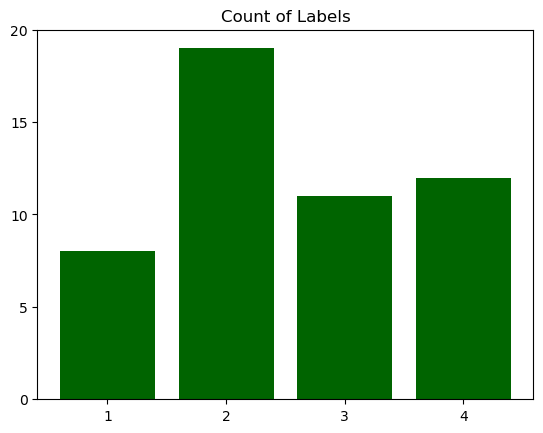

In [8]:
labels = data.groupby('label').count()
labels = labels['id']

x = [1, 2, 3, 4]
index = np.arange(len(labels))

plt.bar(index, labels, color='darkgreen')
plt.xticks(index, x)
plt.yticks(np.arange(0, 21, 5))
plt.title('Count of Labels')
plt.show()

사람이 작성한 리뷰(train.csv)을 학습해서 라벨이 소실된 리뷰(test.csv)에서 각 데이터(row) 중에 어떤 리뷰가 사람이 작성한건지 체크하기  
사람작성 리뷰(1~4)와 AI가 작성한 리뷰를 이진분류 문제로 만들기

## Cleaning Text

In [9]:
# 특수문자 제거, 띄어쓰기 교정
def clean(text):
    text = re.sub(r'[^가-힣A-Za-z0-9 ]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [10]:
data['sentence1'] = data['sentence1'].apply(clean)
data['sentence2'] = data['sentence2'].apply(clean)
data['sentence3'] = data['sentence3'].apply(clean)
data['sentence4'] = data['sentence4'].apply(clean)
data.head()

#https://dacon.io/competitions/official/236178/codeshare/9138?page=1&dtype=recent

,id,sentence1,sentence2,sentence3,sentence4,label
0,TRAIN_000,직원들 마음에 들지 않는다는 것은 알겠지만 가지 말아야 할까 인터넷에서 싸게 살 수...,직원들 진짜 싸가지 없어요 가지 마숑 인터넷이 더 싼거 알면서도 이것저것 좀 물어보...,직원들 정말 싸가지 없네요 인터넷에서 더 싸게 구입할 수 있다는 걸 알면서도 여러 ...,직원들의 태도가 정말 별로였어요 가볼만한 가게라는 소문을 듣고 인터넷으로 더 싼 가...,2
1,TRAIN_001,분위기 최고 2층 창문이 넓어서 공기가 통하는 느낌이에요 조명도 멋지고 음료와 디저...,분위기가 너무 좋아요 2층 창문이 넓어서 쾌적한 느낌이에요 조명도 아름답고 음료와 ...,분위기가 짱 2층 창문이 커서 탁 트여있는 느낌이에요 조명도 예쁘고 음료랑 디저트 ...,분위기가 너무 좋아요 2층 창문이 크고 넓어서 탁 트여있는 느낌이에요 조명도 예뻐서...,3
2,TRAIN_002,일단 장사가 잘 되길 바라는 마음에서 별 다섯 개 드립니다 간도 딱 맞았고 저는 매...,일단 장사가 잘되길 바라는 마음에서 별5개 드립니다 간도 맞았고 매운걸 좋아하는 입...,일단 저는 장사가 잘되기를 바라는 마음에서 별 다섯 개를 주고 싶어요 맛도 딱 맞았...,먼저 칭찬과 응원의 의미로 별 다섯 개를 주고 싶습니다 간도 딱 맞고 저는 매운 음...,2
3,TRAIN_003,1편의 독특함 때문에 살짝 뒤로 밀린 느낌이 있지만 여전히 재미있어요 게임 시스템이...,1편의 신선함에 비해 약간 빛이 바래 보이지만 여전히 재미있게 즐길 수 있어요 게임...,1편의 독특함 때문에 약간의 비교가 불가피하지만 이 게임은 여전히 흥미로워요 시스템...,1편이 워낙 참신했던 탓에 좀 묻힌 감이 있긴 하지만 재미는 여전합니다 시스템도 훨...,4
4,TRAIN_004,빵점 주고 싶은걸 간신히 참았다이런건 사상 유래가 없는조지 루카스 영감의 스페이스 ...,빵점을 주고 싶지만 참아냈습니다 이 영화는 사상 유래가 없는 것 같아요 조지 루카스...,빵점 주고 싶을 정도로 엄청 실망했어요 이 영화는 별들의 전쟁처럼 역사적인 작품인 ...,빵점을 주고 싶었는데 참았어요 이런 영화는 전례가 없는데 조지 루카스의 스타워즈와 ...,1


In [15]:
train_df = data

## 모델링

### koELECTRA, KLUE-RoBERTa
- 트랜스포머 아키텍처를 기반으로 하는 사전 학습 언어 모델
- ELECTRA 논문 리뷰: https://tech.scatterlab.co.kr/electra-review/
- koELECTRA: 구글에서 발표한 ELECTRA(Efficiently Learning an Encoder that Classifies Token Replacements Accurately) 모델 구조를 기반의 한국어 데이터가 학습된 모델
- KLUE-RoBERTa: 한국어 이해 평가를 위한 모델(KLUE) 벤치마크를 일부로 개발, roBERTa 아키텍처를 기반으로 함

In [11]:
import pandas as pd
import numpy as np
# 반복작업의 진행상황 시각화
from tqdm import tqdm_notebook as tqdm

# 딥러닝 모델 구현, 훈련용
import torch
import re
from torch.utils.data import Dataset, DataLoader
# 모델
from transformers import ElectraTokenizer, ElectraForSequenceClassification
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import AdamW
# 최적화 알고리즘
import torch.optim as optim

from sklearn.model_selection import train_test_split
# 학습률의 단계적 조정
from torch.optim.lr_scheduler import StepLR
# 데이터 로딩 및 배치 처리
import torch.nn as nn

import warnings
warnings.filterwarnings("ignore")

/home/hyeonju/anaconda3/envs/project_env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
# 시드고정
def set_seed(seed=42):
    # 난수 생성기 시드 설정
    np.random.seed(seed)
    #pytorch cpu 난수생성기 시드 설정
    torch.manual_seed(seed)
    #pytorch의 gpu 난수생성기 시드 설정
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

set_seed()

In [17]:
# train test 형태변환
train = pd.DataFrame(columns=['id', 'sentence', 'label'])

for idx, row in train_df.iterrows():
    for col_idx, col in enumerate(['sentence1', 'sentence2', 'sentence3', 'sentence4']):
        new_row = {
            'id': f'train_{idx:03d}',
            'sentence': row[col],
            'label': 1 if row['label'] == col_idx + 1 else 0
        }
        new_rows.
    

AttributeError: 'DataFrame' object has no attribute 'append'